In [71]:
%load_ext autoreload
%autoreload 2
import numpy as np
import scipy.optimize
from matplotlib import pyplot as plt

import cavity_qed_systems
import pulse
import cmps_utils
import tncontract as tn
import parameterized_pulse as ppulse

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


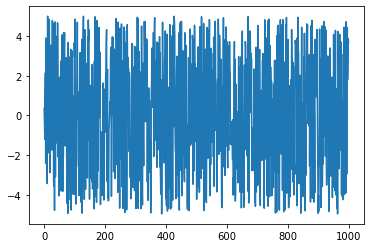

In [160]:
state = cavity_qed_systems.ModulatedTavisCumming(0.01, 2000, [0], 1.0, 1.0)
delta = ppulse.DirectParameterizedPulse(10, 1000, [5, -5])
plt.plot(delta.state())

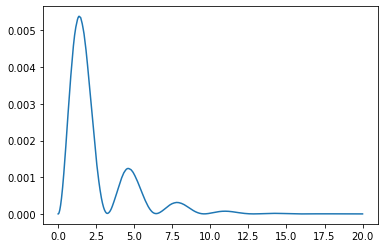

In [161]:
mps = state.get_mps([delta])
single_ph_proj = cmps_utils.compute_single_ph_proj(mps)
plt.plot(state.times, np.abs(single_ph_proj)**2)

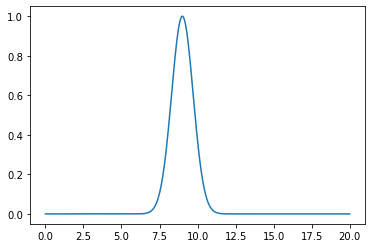

In [162]:
target_photon_pulse = pulse.GaussianPulse(1.0, 9.0, 1.0)
target_mps = cmps_utils.single_ph_state_as_mps(
    target_photon_pulse(state.times), bond_dim=state.sys_dim)

plt.plot(state.times, target_photon_pulse(state.times))

In [167]:
def optimize_overlap(state, target_mps, pulse):
    """Right now we assume that there is only one pulse."""
    def _obj_fun(x):
        pulse.update(x)
        olap = np.abs(state.get_inner_product(target_mps, [pulse]))**2
        print("Current overlap = ", olap)
        return -olap
    
    def _gradient(x):
        pulse.update(x)
        inner_prod = state.get_inner_product(target_mps, [pulse])
        grad_inner_prod = state.get_inner_prod_gradient(
            target_mps, [pulse])[0]
        grad = -2 * pulse.get_gradient(state.times) @ np.real(
            grad_inner_prod * np.conj(inner_prod))
        return grad.astype(float)

    scipy.optimize.minimize(
        _obj_fun, pulse.state(), bounds=pulse.bounds(),
        jac=_gradient, method="L-BFGS-B")

In [168]:
optimize_overlap(state, target_mps, delta)

Current overlap =  0.6151164748413386


<ipython-input-167-951ecd9dcc10>:16: ComplexWarning: Casting complex values to real discards the imaginary part
  return grad.astype(float)


Current overlap =  0.6151165940012678
Current overlap =  0.6145556543281385
Current overlap =  0.6149383995331763
Current overlap =  0.6150802759044446
Current overlap =  0.615109703092339
Current overlap =  0.6151153035335035
Current overlap =  0.6151163529215481
Current overlap =  0.6151165489842256
Current overlap =  0.6151165855959055
Current overlap =  0.6151165924318848
Current overlap =  0.6151165937082456
Current overlap =  0.615116593946557
Current overlap =  0.6151165939910521
Current overlap =  0.615116593999361
Current overlap =  0.6151165940009098
Current overlap =  0.6151165940012018
Current overlap =  0.6151165940012542
Current overlap =  0.6151165940012635
Current overlap =  0.6151165940012692
Current overlap =  0.6151165940012631
Current overlap =  0.6151165940012704
Current overlap =  0.6151167129160561
Current overlap =  0.6151171881578924
Current overlap =  0.6151190824482876
Current overlap =  0.6151246952780577
Current overlap =  0.6145556027869011
Current overlap

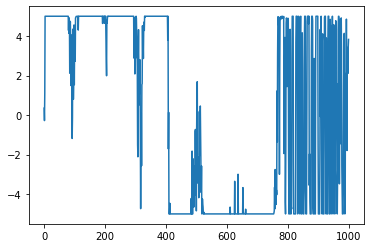

In [169]:
plt.plot(delta.state())

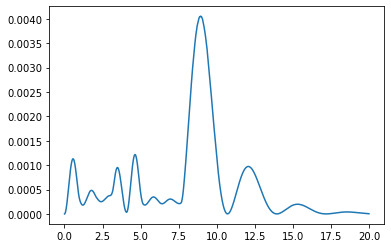

In [170]:
mps = state.get_mps([delta])
single_ph_proj = cmps_utils.compute_single_ph_proj(mps)
plt.plot(state.times, np.abs(single_ph_proj)**2)